In [62]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import yfinance as yf
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error

In [3]:
def stock_data(stock_ticker: str, start_date: str = '2019-01-01', end_date: str = None):
    stock_ticker = stock_ticker.upper()
    
    if end_date is None:
        end_date = datetime.today().strftime('%Y-%m-%d')
    
    data = yf.download(stock_ticker, start=start_date, end=end_date)
    if data.empty:
        print(f"Error: No data found for ticker {stock_ticker}")
        return None
    
    data = data.ffill()  # Forward fill the missing values
    data = data.dropna()
   
    return data

# Get stock tickers from user
ticker_1 = input("Enter 1st stock: ")
ticker_2 = input("Enter 2nd stock: ")
ticker_3 = input("Enter 3rd stock: ")

# Download stock data for the tickers
stock_1 = stock_data(ticker_1)
stock_2 = stock_data(ticker_2)
stock_3 = stock_data(ticker_3)

Enter 1st stock:  tsla
Enter 2nd stock:  nvda
Enter 3rd stock:  msft


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


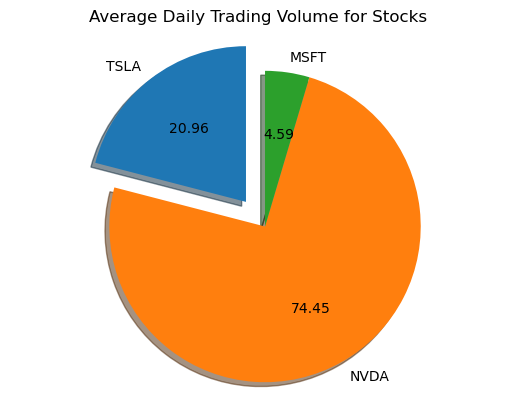

In [4]:
#avg volume of the stocks
def calculate_avg_volume(stock_data):
      return stock_data['Volume'].mean()


avg_volume_1 = calculate_avg_volume(stock_1)
avg_volume_2 = calculate_avg_volume(stock_2)
avg_volume_3 = calculate_avg_volume(stock_3)
avg_volumes = [avg_volume_1, avg_volume_2, avg_volume_3]
stock_labels = [ticker_1.upper(), ticker_2.upper(), ticker_3.upper()]  # Use actual stock tickers entered by the user
myexplode = [0.2, 0, 0]

# Plotting the pie chart

plt.pie(avg_volumes, labels=stock_labels,explode=myexplode,shadow=True, autopct='%.2f', startangle=90)

plt.title('Average Daily Trading Volume for Stocks')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

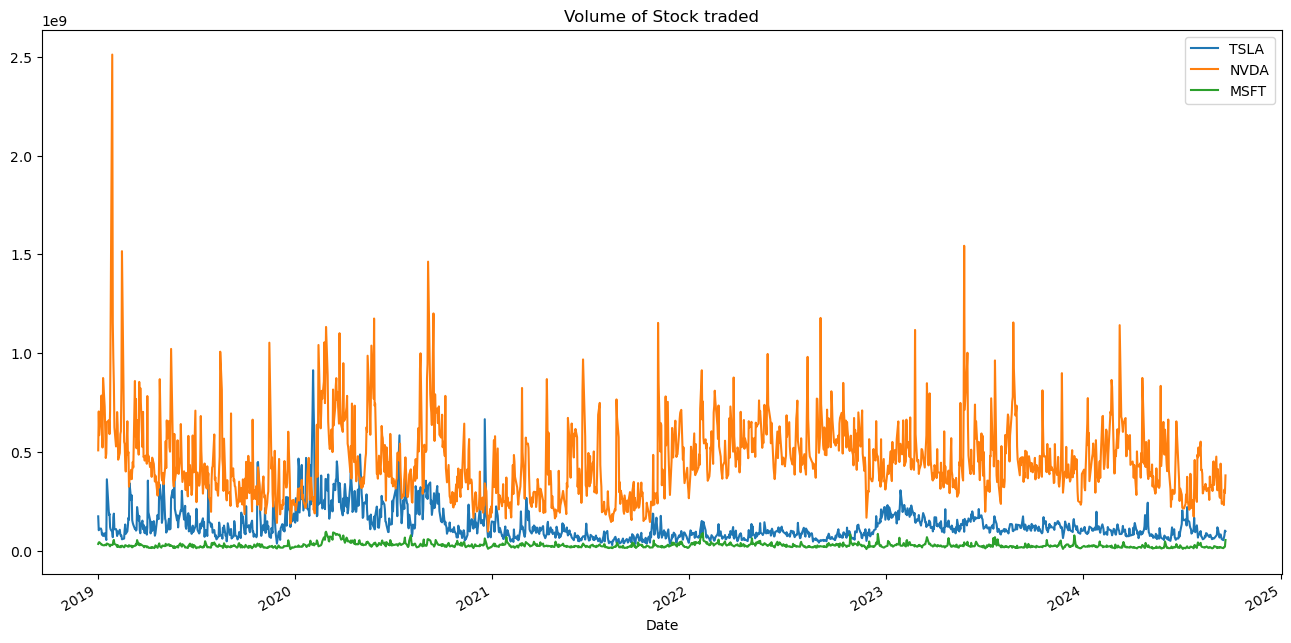

In [5]:
# Volume of stocks overtime
stock_1['Volume'].plot(label = ticker_1.upper(), figsize = (16,8))
stock_2['Volume'].plot(label = ticker_2.upper())
stock_3['Volume'].plot(label = ticker_3.upper())


plt.title('Volume of Stock traded')
plt.legend()

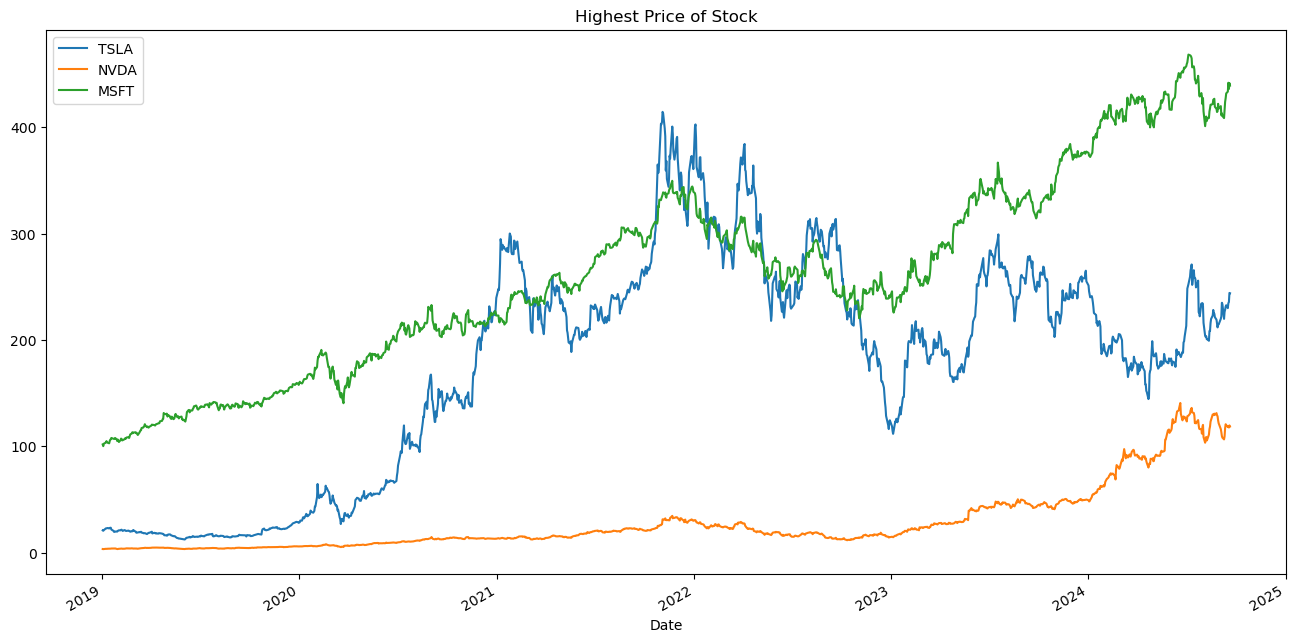

In [6]:
# Highest price of stock
stock_1['High'].plot(label = ticker_1.upper(), figsize = (16,8))
stock_2['High'].plot(label = ticker_2.upper())
stock_3['High'].plot(label = ticker_3.upper())


plt.title('Highest Price of Stock')
plt.legend()

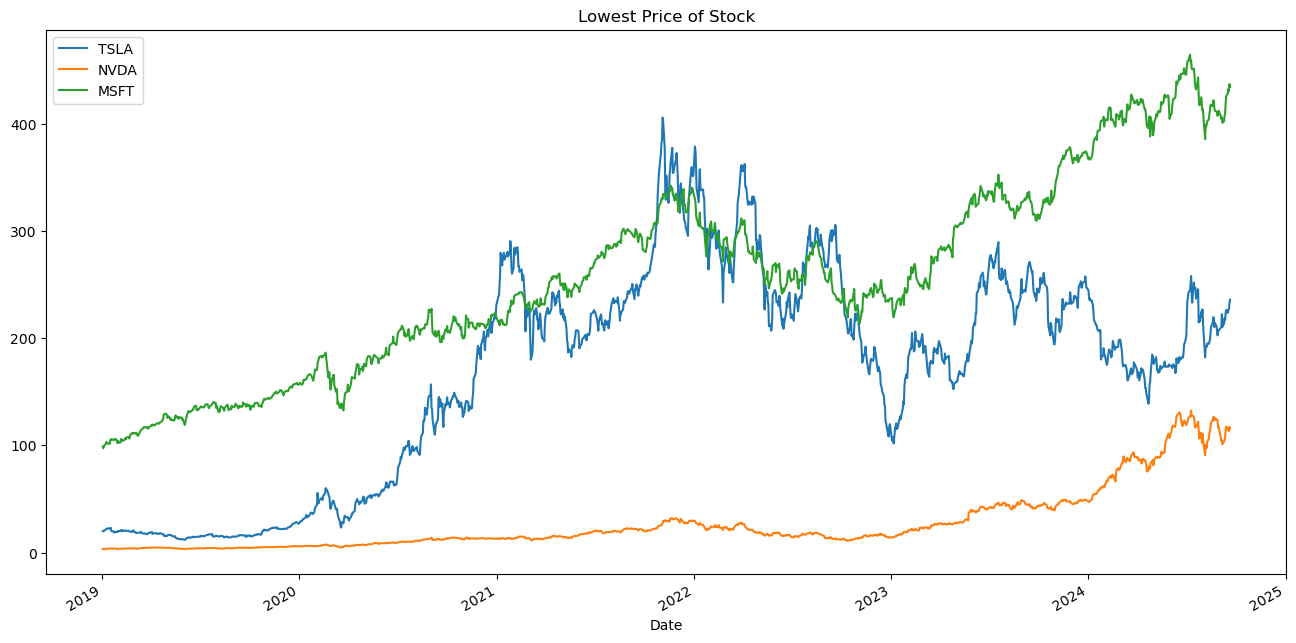

In [7]:
# Lowest price of stock
stock_1['Low'].plot(label = ticker_1.upper(), figsize = (16,8))
stock_2['Low'].plot(label = ticker_2.upper())
stock_3['Low'].plot(label = ticker_3.upper())


plt.title('Lowest Price of Stock')
plt.legend()

Enter your investment amount in dollars:  10000


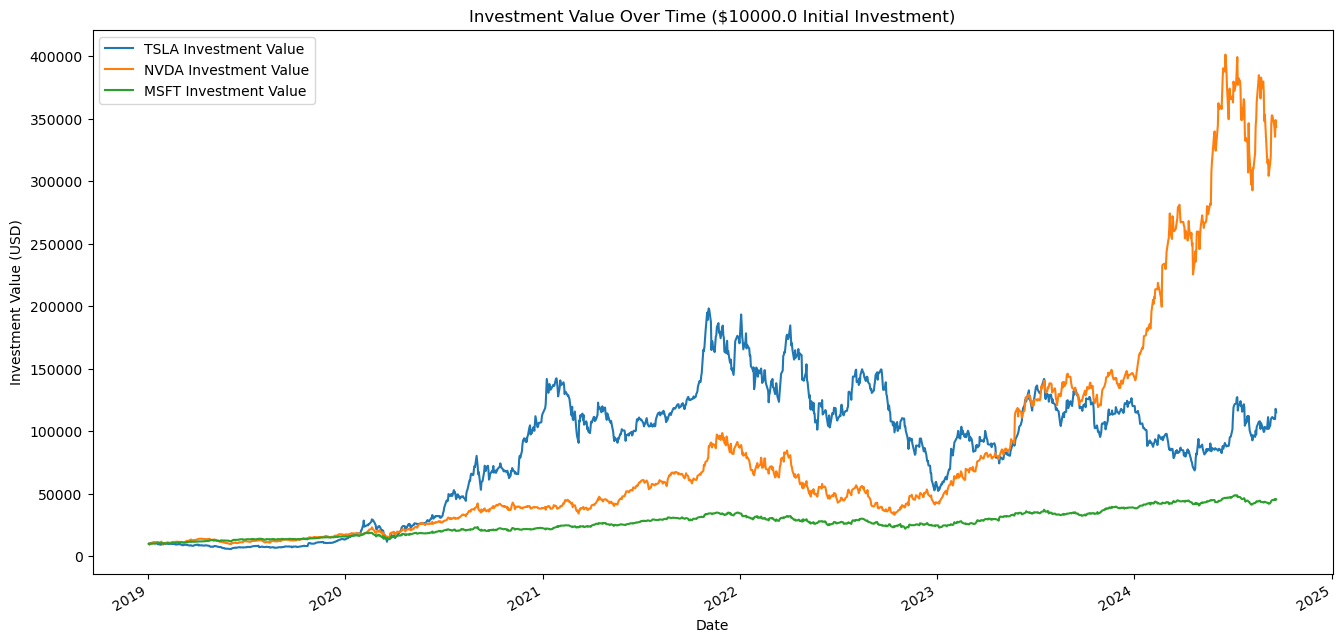

In [8]:
# investment
investment_amount = float(input("Enter your investment amount in dollars: "))

# Function to calculate investment value over time
def calculate_investment_value(stock_data, investment_amount):
    # Get the stock price on the first day
    initial_price = stock_data['Adj Close'].iloc[0]
    
    # Calculate total share
    shares_bought = investment_amount / initial_price
    
    # Calculate the value of the investment over time
    investment_value = shares_bought * stock_data['Adj Close']
    
    return investment_value

# Calculate the investment value over time for each stock
investment_1 = calculate_investment_value(stock_1, investment_amount)
investment_2 = calculate_investment_value(stock_2, investment_amount)
investment_3 = calculate_investment_value(stock_3, investment_amount)

# Plot the investment values over time
plt.figure(figsize=(16,8))
investment_1.plot(label=f'{ticker_1.upper()} Investment Value')
investment_2.plot(label=f'{ticker_2.upper()} Investment Value')
investment_3.plot(label=f'{ticker_3.upper()} Investment Value')

# Add title and legend
plt.title(f'Investment Value Over Time (${investment_amount} Initial Investment)')
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')
plt.legend()
plt.show()

Enter the stock ticker:  nvda


[*********************100%***********************]  1 of 1 completed


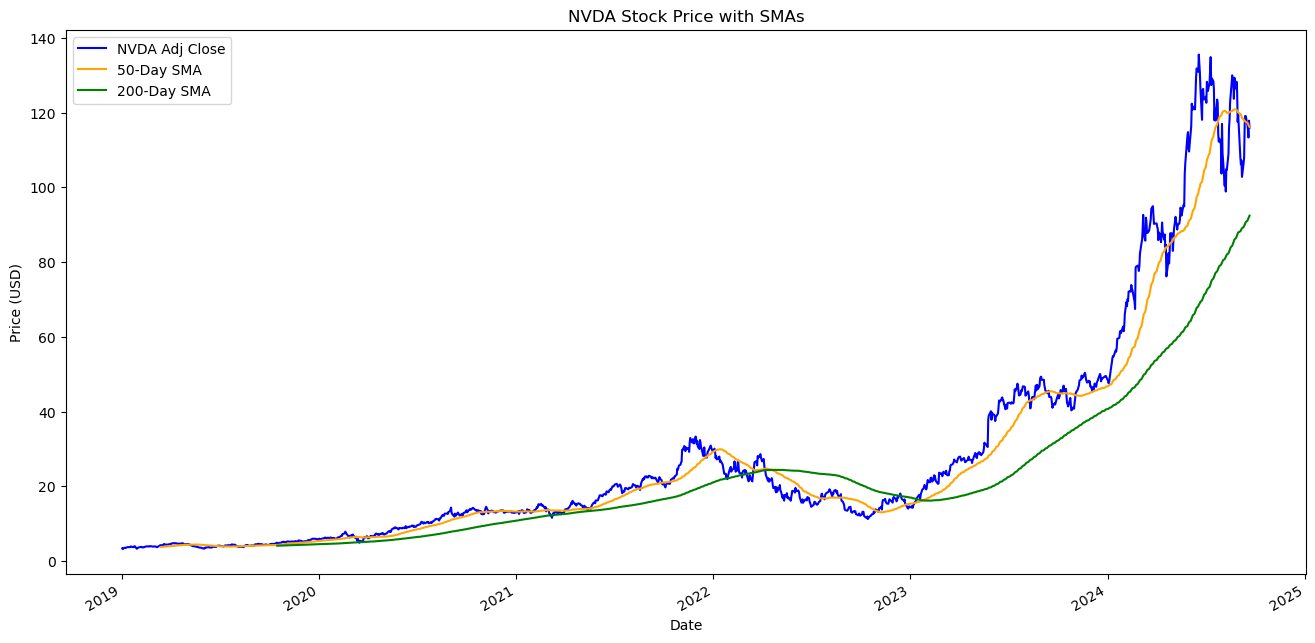

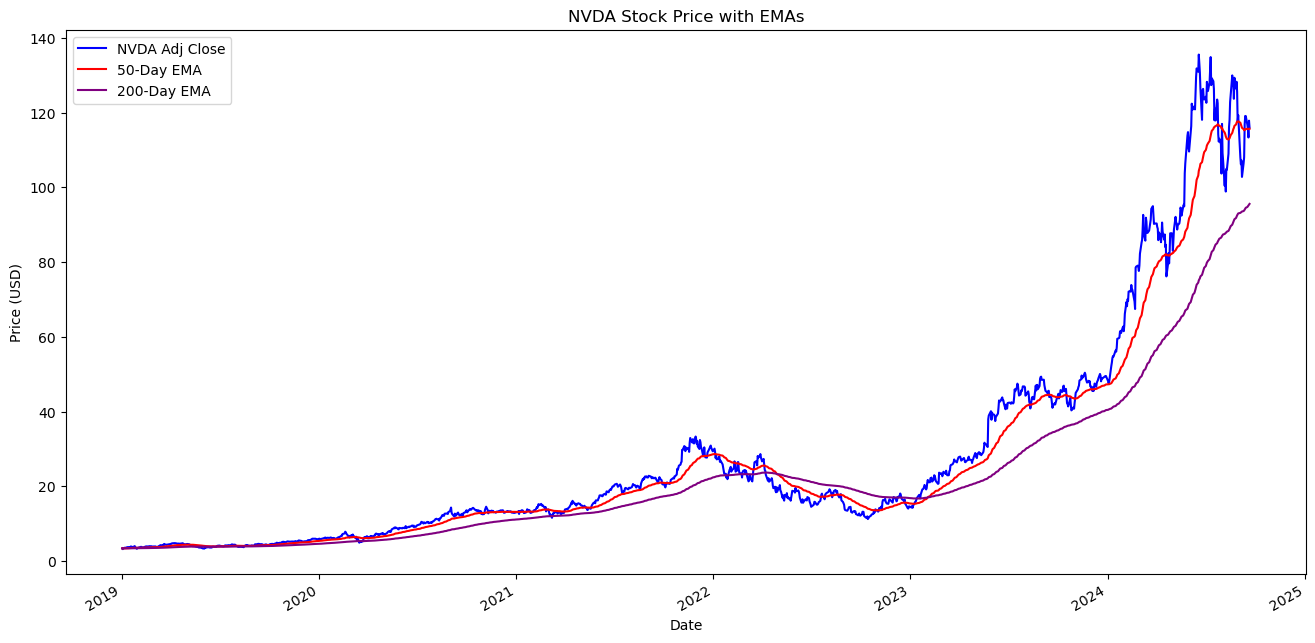

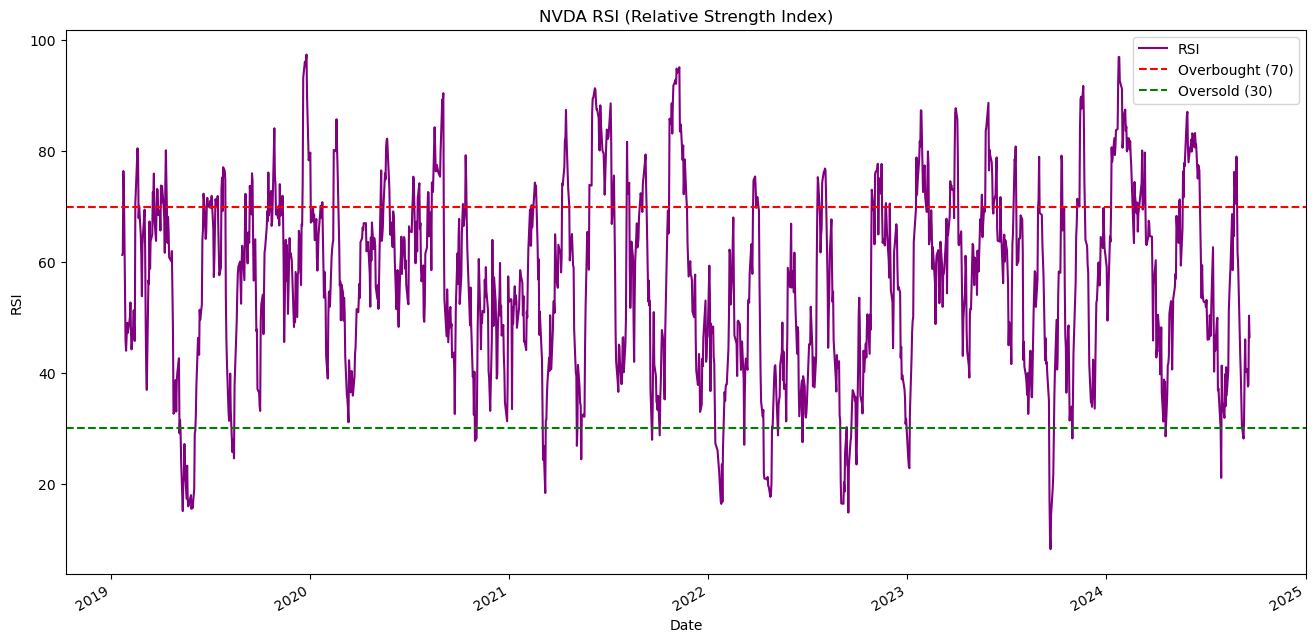

In [9]:

# Visualizing EMAs, SMAs AND RSI technical indicators
def calculate_technical_indicators(stock_data):
    # Calculate RSI
    delta = stock_data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    stock_data['RSI'] = 100 - (100 / (1 + rs))
    
    # Calculate 50-day and 200-day Simple Moving Averages (SMA)
    stock_data['50_SMA'] = stock_data['Adj Close'].rolling(window=50).mean()
    stock_data['200_SMA'] = stock_data['Adj Close'].rolling(window=200).mean()

    # Calculate 50-day and 200-day Exponential Moving Averages (EMA)
    stock_data['50_EMA'] = stock_data['Adj Close'].ewm(span=50, adjust=False).mean()
    stock_data['200_EMA'] = stock_data['Adj Close'].ewm(span=200, adjust=False).mean()
    
    return stock_data

# Main execution
ticker_1 = input("Enter the stock ticker: ")

# Download stock data for the ticker
stock_1 = stock_data(ticker_1)

# Calculate technical indicators
stock_1 = calculate_technical_indicators(stock_1)

# Plot stock price with SMAs 
plt.figure(figsize=(16,8))
stock_1['Adj Close'].plot(label=f'{ticker_1.upper()} Adj Close', color='blue')
stock_1['50_SMA'].plot(label='50-Day SMA', color='orange')
stock_1['200_SMA'].plot(label='200-Day SMA', color='green')
plt.title(f'{ticker_1.upper()} Stock Price with SMAs')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plot stock price with EMAs
plt.figure(figsize=(16,8))
stock_1['Adj Close'].plot(label=f'{ticker_1.upper()} Adj Close', color='blue')
stock_1['50_EMA'].plot(label='50-Day EMA', color='red')
stock_1['200_EMA'].plot(label='200-Day EMA', color='purple')
plt.title(f'{ticker_1.upper()} Stock Price with EMAs')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(16,8))
stock_1['RSI'].plot(label='RSI', color='purple')
plt.title(f'{ticker_1.upper()} RSI (Relative Strength Index)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.legend()
plt.show()


In [10]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


Epoch 10/100, Loss: 0.1955
Epoch 20/100, Loss: 0.1183
Epoch 30/100, Loss: 0.0253
Epoch 40/100, Loss: 0.0188
Epoch 50/100, Loss: 0.0115
Epoch 60/100, Loss: 0.0073
Epoch 70/100, Loss: 0.0063
Epoch 80/100, Loss: 0.0066
Early stopping at epoch 83


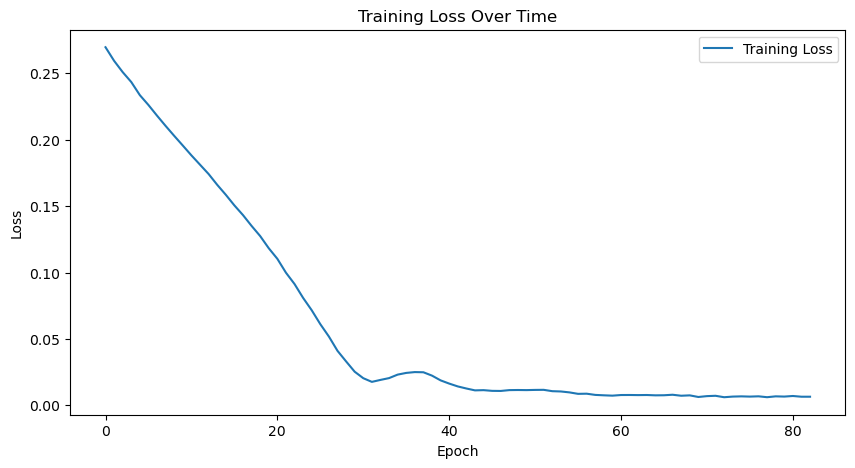

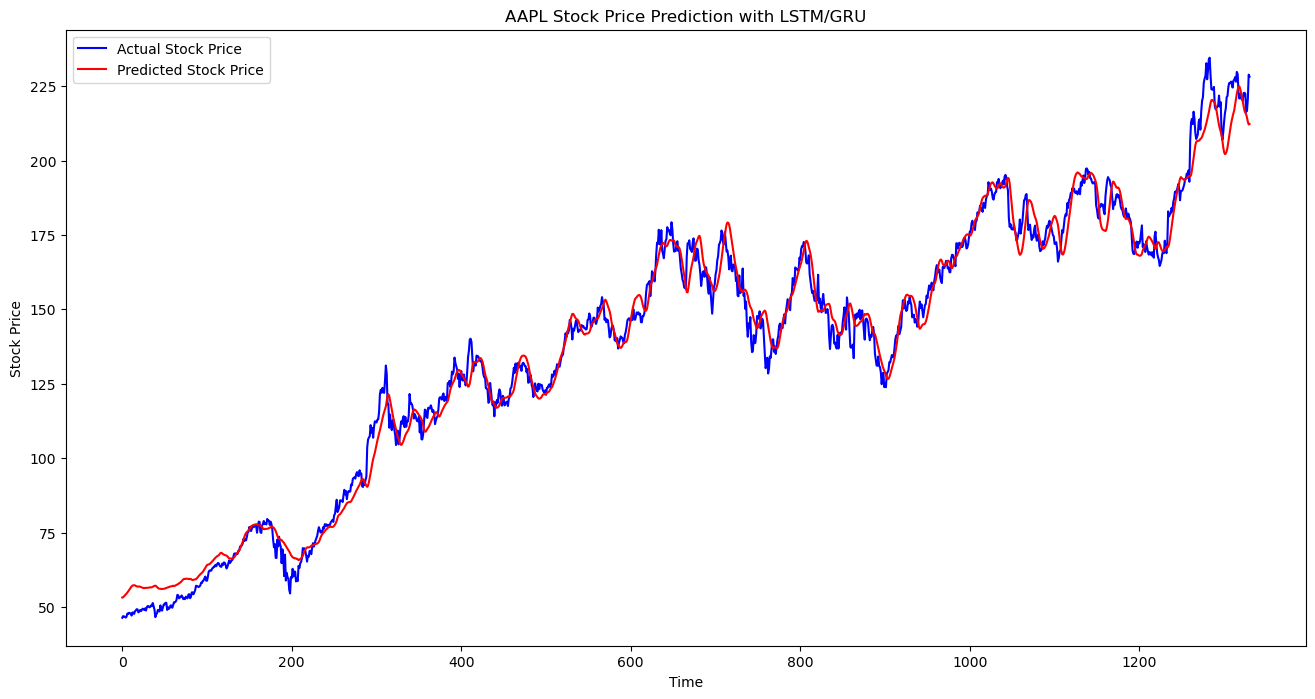

Epoch 10/20, Loss: 0.0634
Epoch 20/20, Loss: 0.0293


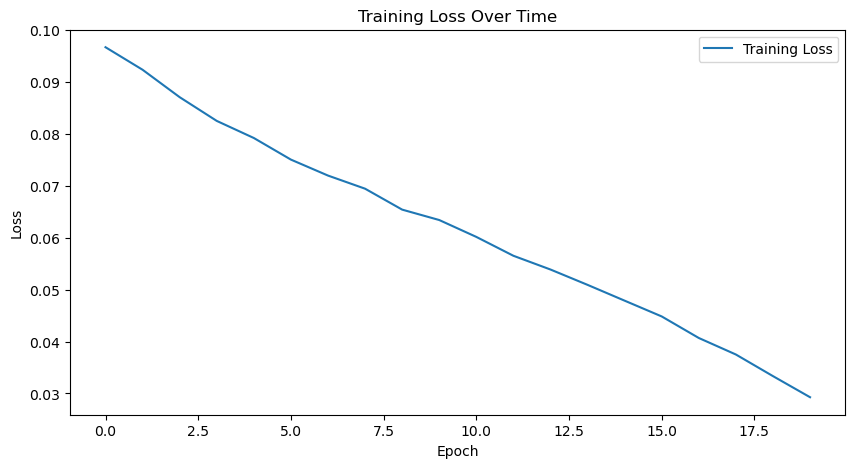

Fold 1, MSE: 23452.3644, RMSE: 153.1416, MAE: 153.1400
Epoch 10/20, Loss: 0.2049
Epoch 20/20, Loss: 0.0913


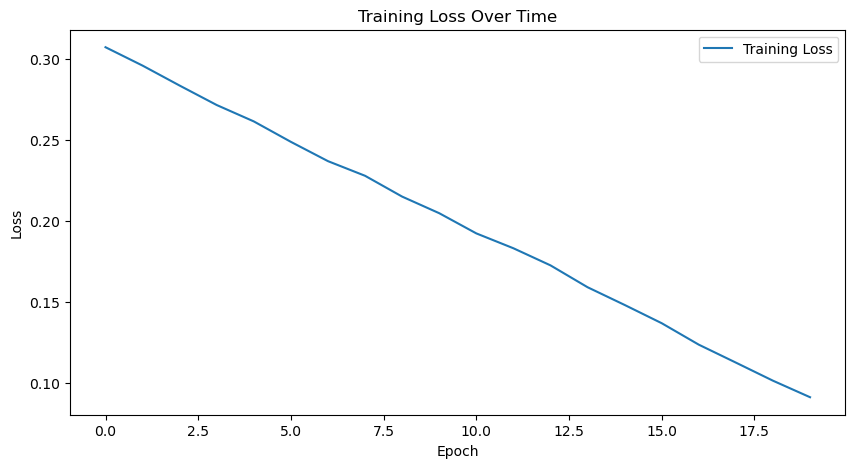

Fold 2, MSE: 21073.4592, RMSE: 145.1670, MAE: 145.1667
Epoch 10/20, Loss: 0.2069
Epoch 20/20, Loss: 0.1182


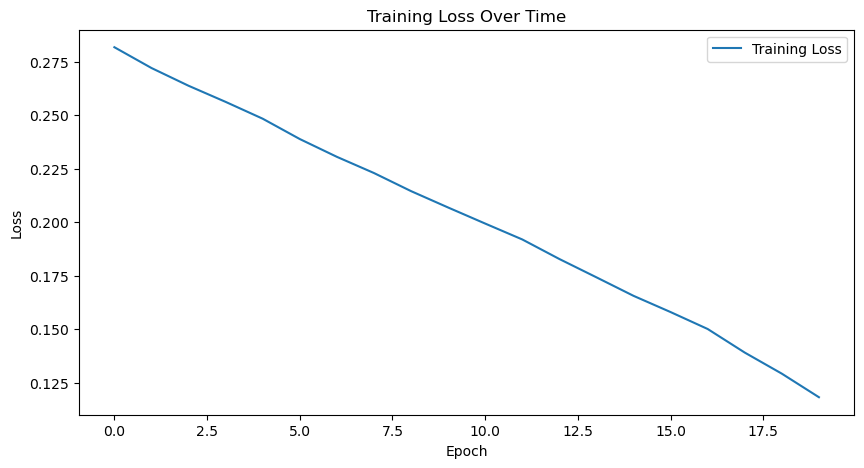

Fold 3, MSE: 18568.1842, RMSE: 136.2651, MAE: 136.2617
Epoch 10/20, Loss: 0.1620
Epoch 20/20, Loss: 0.0515


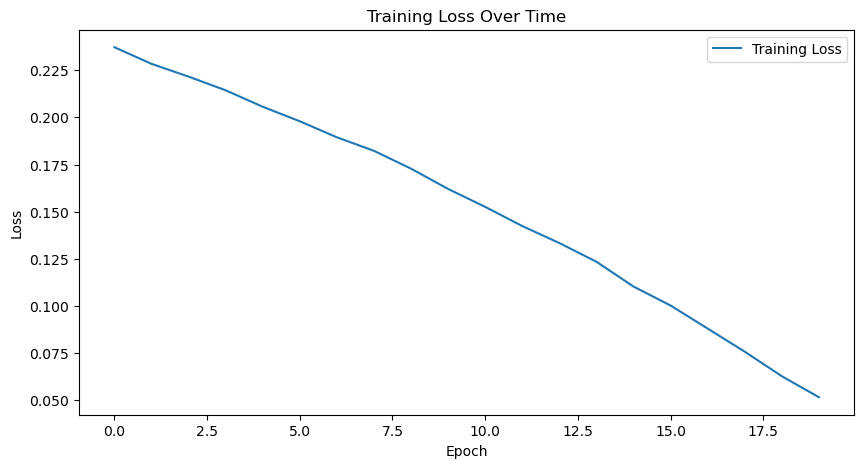

Fold 4, MSE: 20187.3443, RMSE: 142.0822, MAE: 142.0776
Epoch 10/20, Loss: 0.1185
Epoch 20/20, Loss: 0.0491


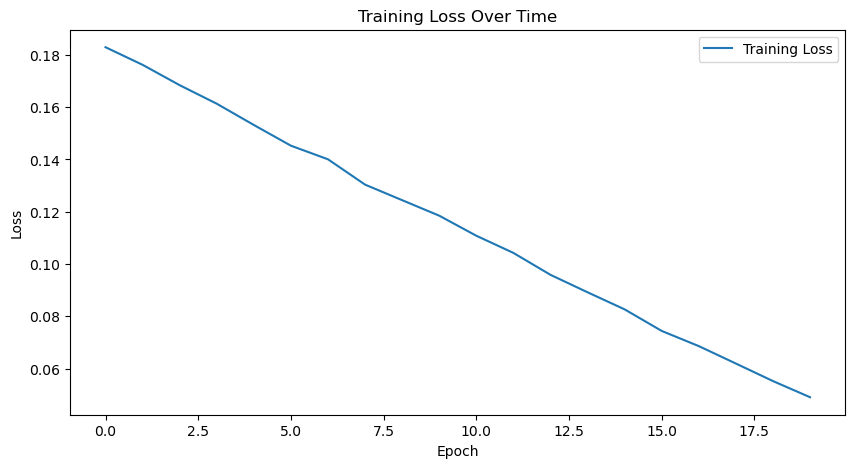

Fold 5, MSE: 15727.7434, RMSE: 125.4103, MAE: 125.4087
Model Accuracy: 98.48%


In [72]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import yfinance as yf
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Step 1: Fetch stock data (renaming the function to avoid confusion)
def fetch_stock_data(stock_ticker: str, start_date: str = '2019-01-01', end_date: str = None):
    stock_ticker = stock_ticker.upper()
    
    if end_date is None:
        end_date = datetime.today().strftime('%Y-%m-%d')
    
    data = yf.download(stock_ticker, start=start_date, end=end_date)
    data = data.ffill()  # Forward fill the missing values
    data = data.dropna()

    # Add Moving Averages and RSI
    data['MA10'] = data['Adj Close'].rolling(window=10).mean()
    data['MA50'] = data['Adj Close'].rolling(window=50).mean()
    
    # Calculate RSI (Relative Strength Index)
    delta = data['Adj Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    data.dropna(inplace=True)
    return data

# Example usage to get stock data
ticker_1 = 'AAPL'  # Replace with the stock of your choice
stock_1 = fetch_stock_data(ticker_1)

# Step 2: Prepare the data for LSTM/GRU (include additional features)
def prepare_lstm_data(stock_data, sequence_length=60):
    features = stock_data[['Adj Close', 'MA10', 'MA50', 'RSI']].values
    scaler = MinMaxScaler(feature_range=(-1, 1))  # Normalize data
    scaled_data = scaler.fit_transform(features)
    
    x_data = []
    y_data = []
    
    for i in range(sequence_length, len(scaled_data)):
        x_data.append(scaled_data[i-sequence_length:i])
        y_data.append(scaled_data[i, 0])  # Predicting 'Adj Close'
    
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    
    x_data = torch.tensor(x_data, dtype=torch.float32)  # 3D for LSTM/GRU
    y_data = torch.tensor(y_data, dtype=torch.float32)
    
    return x_data, y_data, scaler

# Prepare the data with additional features
sequence_length = 60  # Sequence of 60 days
x_data, y_data, scaler = prepare_lstm_data(stock_1, sequence_length)

# Step 3: Define the LSTM or GRU Model with Dropout
class StockPredictor(nn.Module):
    def __init__(self, input_size=4, hidden_layer_size=50, output_size=1, model_type='LSTM'):
        super(StockPredictor, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.model_type = model_type

        if model_type == 'LSTM':
            self.model = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        elif model_type == 'GRU':
            self.model = nn.GRU(input_size, hidden_layer_size, batch_first=True)
        
        self.dropout = nn.Dropout(0.2)  # Add dropout layer with 20% rate
        self.fc = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(1, x.size(0), self.hidden_layer_size).requires_grad_()
        if self.model_type == 'LSTM':
            c_0 = torch.zeros(1, x.size(0), self.hidden_layer_size).requires_grad_()
            lstm_out, (h_n, c_n) = self.model(x, (h_0.detach(), c_0.detach()))
        else:
            lstm_out, h_n = self.model(x, h_0.detach())

        # Apply dropout
        lstm_out = self.dropout(lstm_out)

        predictions = self.fc(lstm_out[:, -1, :])
        return predictions

# Step 4: Train the LSTM or GRU Model with Early Stopping
def train_model(x_data, y_data, model_type='LSTM', num_epochs=100, learning_rate=0.001, patience=10):
    input_size = x_data.shape[2]  # Number of input features
    model = StockPredictor(input_size=input_size, model_type=model_type)
    criterion = nn.MSELoss()  # Mean Squared Error Loss
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    all_losses = []
    best_loss = float('inf')
    no_improvement_epochs = 0
    
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        
        outputs = model(x_data)
        loss = criterion(outputs, y_data.unsqueeze(1))  # Match output shape
        all_losses.append(loss.item())  # Save the loss value
        
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        # Early stopping check
        if loss.item() < best_loss:
            best_loss = loss.item()
            no_improvement_epochs = 0
        else:
            no_improvement_epochs += 1
        
        if no_improvement_epochs >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
        
        if (epoch + 1) % 10 == 0:  # Print loss every 10 epochs
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')
    
    # Plot the loss over epochs
    plt.figure(figsize=(10,5))
    plt.plot(all_losses, label="Training Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title("Training Loss Over Time")
    plt.legend()
    plt.show()
    
    return model

# Train the LSTM model (can switch to GRU by setting model_type='GRU')
model = train_model(x_data, y_data, model_type='LSTM', patience=10)

# Step 5: Make Predictions with the LSTM/GRU Model
def make_predictions(model, x_data, scaler):
    model.eval()
    predictions = model(x_data)
    predictions = predictions.detach().numpy()

    # Create a dummy array for inverse transformation
    dummy = np.zeros((predictions.shape[0], 4))  # 4 because of ['Adj Close', 'MA10', 'MA50', 'RSI']
    dummy[:, 0] = predictions[:, 0]  # Assign predictions to the 'Adj Close' column

    # Inverse transform and return the predicted 'Adj Close' prices
    return scaler.inverse_transform(dummy)[:, 0]  # Only return the 'Adj Close' column

# Predict the stock prices
predicted_stock_prices = make_predictions(model, x_data, scaler)

# Step 6: Plot the Results
plt.figure(figsize=(16,8))
plt.plot(stock_1['Adj Close'].values[sequence_length:], label="Actual Stock Price", color="blue")
plt.plot(predicted_stock_prices, label="Predicted Stock Price", color="red")
plt.title(f"{ticker_1.upper()} Stock Price Prediction with LSTM/GRU")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Step 7: Implement K-Fold Cross-Validation
def cross_validate(X, y, k=5):
    kf = KFold(n_splits=k)
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]
        
        model = StockPredictor(input_size=X.shape[2], model_type='LSTM')
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        
        X_train_fold = torch.tensor(X_train_fold).float()
        y_train_fold = torch.tensor(y_train_fold).float()
        X_test_fold = torch.tensor(X_test_fold).float()
        y_test_fold = torch.tensor(y_test_fold).float()
        
        # Train the model
        train_model(X_train_fold, y_train_fold, model_type='LSTM', num_epochs=20)
        
        # Make predictions
        model.eval()
        with torch.no_grad():
            predictions = model(X_test_fold).detach().numpy()
            
            # Create a dummy array for inverse transformation
            dummy = np.zeros((predictions.shape[0], 4))  # 4 because of ['Adj Close', 'MA10', 'MA50', 'RSI']
            dummy[:, 0] = predictions[:, 0]  # Assign predictions to the 'Adj Close' column

            # Inverse transform only the 'Adj Close' predictions
            test_predictions = scaler.inverse_transform(dummy)[:, 0]  # Only return 'Adj Close' column
            
            # Calculate MSE, RMSE, and MAE for the fold
            mse = mean_squared_error(y_test_fold, test_predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test_fold, test_predictions)
            print(f'Fold {fold+1}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}')

# Cross-validate the model
cross_validate(x_data.numpy(), y_data.numpy())


def calculate_r2_accuracy(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    accuracy = r2 * 100  # Convert to percentage
    return accuracy

# Predict the stock prices
predicted_stock_prices = make_predictions(model, x_data, scaler)

# Convert the y_data tensor back to numpy and inverse scale the true values
true_stock_prices = scaler.inverse_transform(np.hstack((y_data.unsqueeze(1).numpy(), np.zeros((y_data.shape[0], 3)))))[:, 0]

# Calculate the accuracy (R² score as percentage)
accuracy = calculate_r2_accuracy(true_stock_prices, predicted_stock_prices)

# Print the accuracy
print(f"Model Accuracy: {accuracy:.2f}%")
